### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing and EDA

In [3]:
df = pd. read_csv("hotel_reservations.csv")
df.shape

(36275, 19)

In [5]:
df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
# Remove the columns booking_id, arrival_year, arrival_month, and arrival_date
df = df.drop(["booking_id", "arrival_year", "arrival_month", "arrival_date"],axis=1)
df.shape

(36275, 15)

# Visualization

(array([0, 1]), [Text(0, 0, 'Not_Canceled'), Text(1, 0, 'Canceled')])

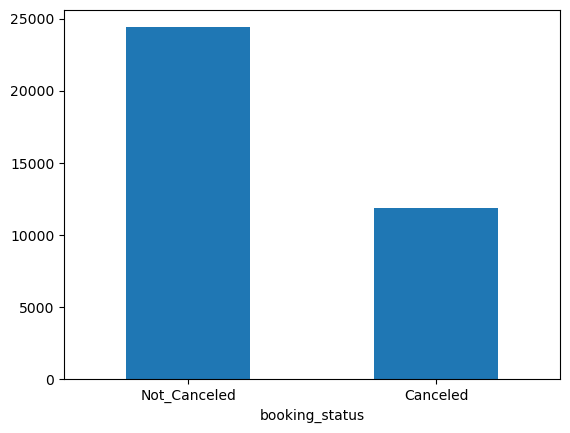

In [27]:
# Visualize the booking_status
df["booking_status"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

<Axes: xlabel='booking_status', ylabel='lead_time'>

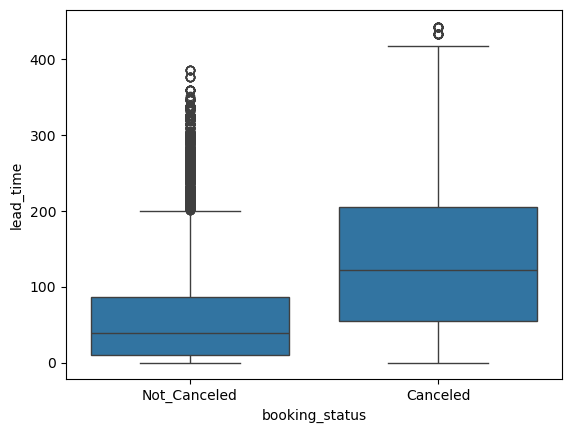

In [31]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
import seaborn as sns
sns.boxplot(x="booking_status", y="lead_time", data=df)

<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>

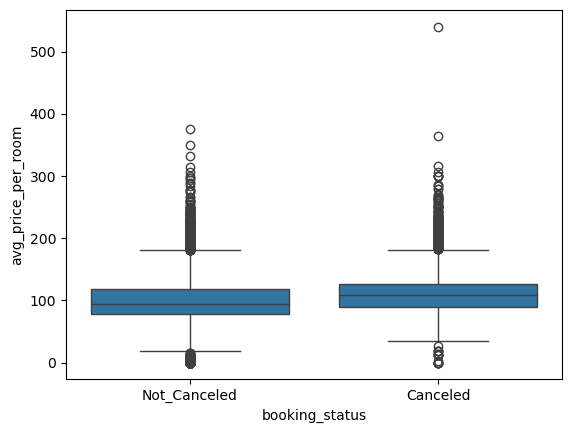

In [33]:
# Visualize the average price per room for canceled and not canceled bookingssns.boxplot(x='booking_status', y='avg_price_per_room', data=df)

sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)

# One hot Encoding

In [37]:
df = pd.get_dummies(df, columns= ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to standardize
num_features = ['lead_time', 'avg_price_per_room']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
df[num_features] = scaler.fit_transform(df[num_features])

In [49]:
# Define features(X) and target (y: booking_status)
X = df.drop("booking_status",axis=1)
y  = df["booking_status"]

### Implementing K-Fold Cross Validation

In [51]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=7, shuffle=True, random_state=42)

scores_NB = cross_val_score(GaussianNB(), X, y, cv=kf)

np.average(scores_NB)

0.4086008945293444

In [53]:
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=7, shuffle=True, random_state=42)

scores_log = cross_val_score(LogisticRegression(), X, y, cv=kf)

np.average(scores_log)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.800413457625681

In [55]:
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=7, shuffle=True, random_state=42)

scores_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=kf)

np.average(scores_dt)

0.8580015114451799

### Implementing Stratified K-Fold Cross Validation

In [58]:
# Initialize a StratifiedKFold cross-validator with 7 splits
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_NB = cross_val_score(GaussianNB(), X, y, cv=skf)

np.average(scores_NB)

0.4084906960716747

In [60]:
scores_log = cross_val_score(LogisticRegression(), X, y, cv=skf)

np.average(scores_log)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8011026878015162

In [62]:
scores_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=skf)

np.average(scores_dt)

0.8563197794624398

### Implementing Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV( 
    DecisionTreeClassifier(),
    {
        'criterion':["gini","entropy"],
        "max_depth":[5,10,15]
    },
    cv=5,
    return_train_score=False
)
clf.fit(X, y)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]          
        }
    }
}


# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []
for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores

,model,best_score,best_params
0,naive_bayes,0.409483,{'var_smoothing': 1e-07}
1,random_forest,0.877877,"{'max_depth': 15, 'n_estimators': 100}"


### Implementing Randomized Search CV

In [72]:
from sklearn.model_selection import RandomizedSearchCV


clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
    cv=7,
    return_train_score=False,
    n_iter=3
)
clf.fit(X, y)

# Print Best Parameters
print("Best Parameters for Random Forest (RandomizedSearchCV): ", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df

Best Parameters for Random Forest (RandomizedSearchCV):  {'n_estimators': 50, 'max_depth': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,2.449165,0.249127,0.129218,0.071610,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.889253,0.889425,0.885758,0.887881,0.890004,0.882671,0.884794,0.887112,0.002558,1
1,2.438704,0.724914,0.096375,0.020600,50,15,"{'n_estimators': 50, 'max_depth': 15}",0.878449,0.882092,0.879004,0.876496,0.878232,0.869741,0.870899,0.876416,0.004163,2
2,1.921558,0.128210,0.073244,0.006103,100,5,"{'n_estimators': 100, 'max_depth': 5}",0.794135,0.803551,0.787534,0.803551,0.790235,0.800656,0.786376,0.795148,0.006883,3
